# Introduction
In this notebook will try to find any insights from an unsupervised dataset using clustering techniques and checking which works better.
The dataset contain information about different drinks and their properties.




## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly.figure_factory as ff

## Data loading and a quick first look

In [2]:
dataset=pd.read_csv('../input/drinks/Drink.csv')

print(dataset.head())
print(dataset.shape)
print(dataset.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9  
(4898, 1

## Plotting Correlation Heatmap

After installing all the required libraries and imported our dataset, the next step will be to run a Correlation Heatmap.

Analysing this correlation heatmap shown below we learnt that "Density" has a high correlation with some other variables. For exmple, it has quite a lot of negative correlation with "Alcohol", which is obvious because the more alcohol a drink have the less density it has.

In [3]:
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

## Data Preparation

As this is an unsupervised dataset (which means it has no target variables) I will try to find anything, and this is literally anything.

As a first idea, it came to my mind to try to find if depending on some properties we can find if a drink is likely to have low or high percentage of alcohol, so I will first convert this column as follows, as a quick way to do it we will find the median of this column and will take this value as a reference, if a feature is lower than the median will take this a "Low percentage of alcohol", on the other hand if it's higher will convert the value to "High percentage of alcohol".
I will explain in detail what is the purpose of this later.

In [4]:
alcohol_median = dataset['alcohol'].median()

def converter1(column):
    if column <= alcohol_median:
        return 1 # "Low" percentage of alcohol
    else:
        return 0 # "High" percentage of alcohol

dataset['alcohol'] = dataset['alcohol'].apply(converter1)
print(dataset.head())

##Did not get good results with this conversion so we did not use it
#def converter2(column):
#    if column <= 3.3:
#        return 1 # Higher acidity
#    else:
#        return 0 # Lower acidity
#
#dataset['pH'] = dataset['pH'].apply(converter2)
#print(dataset.head())
#print(dataset.info())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0        1  
1        1  
2        1  
3        1  
4        1  


## Dropping redundant columns 

As mentioned before, "density" and "alcohol" give similar information in this datast, that's why it was decided to remove one of them.

In [5]:
X = dataset.drop(['density'], axis = 1)
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(4898, 10)


## Dividing data into subsets

Now, I will randomly select different columns to create new datasets or subsets from the original dataset.

In [6]:
subset1 = X[['pH','alcohol', 'sulphates', 'chlorides', 'total sulfur dioxide']] 
subset2 = X[['alcohol','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']] 
subset3 = X[['pH', 'fixed acidity', 'residual sugar']]

## Normalizing subsets

Next step is to normalize the features in this subsets, so that each feature has mean equal to 0 and variance equal to 1.

In [7]:
feature_scaler = StandardScaler()
X1 = feature_scaler.fit_transform(subset1)
X2 = feature_scaler.fit_transform(subset2)
X3 = feature_scaler.fit_transform(subset3)

# Analysis on subset 1
First thing; I will anylise and try to find insights in the first subset which contains info of the columns *'pH', 'alcohol', 'sulphates', 'chlorides'* and '*total sulfur dioxide*'.


## Elbow Plot Method
Next, we would need to find the ideal number of clusters using Elbow Plot, but for the purposes of this notebook (and this subset) we may not take this a lot into consideration...

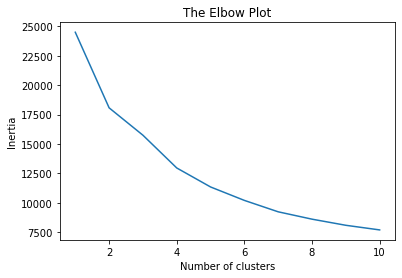

In [8]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


## K-Means
Now we run k-means to generate labels in the subset 1

The main point of this dataset is to find either if there is any difference between High and Low alcohol percentage, it's because of that that I decided to select only 2 clusters.

In [9]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X1)

KMeans(n_clusters=2)

## Implementing PCA 
Now we implement PCA to visualize subset 1

As shown below, we can appreciate a crowding problem this PCA visualization. That is why we will implement t-SNE to visualize the same subset and compare diffecences.

In [10]:
pca = PCA(n_components = 2)
pca.fit(X1)
x_pca = pca.transform(X1)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

#subset1 = X[['pH','alcohol', 'sulphates', 'chlorides', 'total sulfur dioxide']]  #When added "residual sugar" or "fixed acidity" clusters went away

total_sulfur_dioxide = list(dataset['total sulfur dioxide'])
chlorides = list(dataset['chlorides'])
pH = list(dataset['pH'])
sulphates = list(dataset['sulphates'])
alcohol = list(dataset['alcohol'])

data = [go.Scatter(x=x_pca[:,0], y=x_pca[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'pH:{a}, alcohol:{b}, sulphates{c}, chlorides{d}, total sulfur dioxide{e}' for a,b,c,d,e in list(zip(pH,alcohol,sulphates,chlorides,total_sulfur_dioxide))],
                                hoverinfo='text')]

layout = go.Layout(title = 'PCA Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Principal Component'),
                    yaxis = dict(title='Second Principal Component'))

fig = go.Figure(data=data, layout=layout)
fig.show()

Variance explained by each of the n_components:  [0.33479331 0.23716663]
Total variance explained by the n_components:  0.5719599379634446


## Implementing t-SNE 

We can appreciate how t-SNE separate clusters way better.

As a quick conclusion here, we can see that implementing t-SNE we could separate two clusters where the ones on the left are drinks with High alcohol percentage and the ones on the right are Low alcohol percentage drinks.

In [11]:
tsne = TSNE(n_components = 2, perplexity = 30,n_iter=2000)
x_tsne = tsne.fit_transform(X1)

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'pH:{a}, alcohol:{b}, sulphates{c}, chlorides{d}, total sulfur dioxide{e}' for a,b,c,d,e in list(zip(pH,alcohol,sulphates,chlorides,total_sulfur_dioxide))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 1000, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()

# Analysis on Subset 2

Now we will basically repear the same steps but now on the subset 2 which contains the columns *'alcohol', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',* and *'chlorides'*.


## K-Means

In [12]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X2)

KMeans(n_clusters=2)

## Implementing PCA

We also had a crowding problem here.

In [13]:
pca = PCA(n_components = 2)
pca.fit(X2)
x_pca = pca.transform(X2)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

# Subset2 = X[['alcohol','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']]

chlorides = list(dataset['chlorides'])
residual_sugar = list(dataset['residual sugar'])
fixed_acidity = list(dataset['fixed acidity'])
alcohol = list(dataset['alcohol'])
volatile_acidity = list(dataset['volatile acidity'])
citric_acid = list(dataset['citric acid'])

data = [go.Scatter(x=x_pca[:,0], y=x_pca[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'alcohol:{a}, fixed acidity:{b}, volatile acidity{c}, citric acid{d}, residual sugar{e}, chlorides{f}' for a,b,c,d,e,f in list(zip(alcohol,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides))],
                                hoverinfo='text')]

layout = go.Layout(title = 'PCA Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Principal Component'),
                    yaxis = dict(title='Second Principal Component'))
fig = go.Figure(data=data, layout=layout)
fig.show()

Variance explained by each of the n_components:  [0.27675578 0.2126217 ]
Total variance explained by the n_components:  0.4893774804251309


## Implementing t-SNE

Like in the first subset, after implementing t-SNE we were able to appreciate the clusters much better.

In [14]:
tsne = TSNE(n_components = 2, perplexity = 30,n_iter=2000)
x_tsne = tsne.fit_transform(X2)

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'alcohol:{a}, fixed acidity:{b}, volatile acidity{c}, citric acid{d}, residual sugar{e}, chlorides{f}' for a,b,c,d,e,f in list(zip(alcohol,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 1000, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()

# Analysis on Subset 3

With the subset 3 was everything different, I started trying to find any insights with the column "resudial sugar", after that I tried with the columns "pH", and I did not get good results.


In [15]:
##Tried puting this step down here... didnt work...
#def converter2(column):
#    if column <= 10:
#        return 2 # 
#    elif column <= 20:
#        return 1
#    else:
#        return 0 #

#dataset['residual sugar'] = dataset['residual sugar'].apply(converter2)

#print(dataset.head())
#print(dataset.info())



# Defining Low & High percentage of alcohol
def converter2(column):
    if column <= 3.3:
        return 1 # Higher acidity
    else:
        return 0 # Lower acidity

dataset['pH'] = dataset['pH'].apply(converter2)
print(dataset.head())
print(dataset.info())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density  pH  sulphates  alcohol  
0                 45.0                 170.0   1.0010   1       0.45        1  
1                 14.0                 132.0   0.9940   1       0.49        1  
2                 30.0                  97.0   0.9951   1       0.44        1  
3                 47.0                 186.0   0.9956   1       0.40        1  
4                 47.0                 186.0   0.9956   1       0.40        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4

## Running KMeans to generate labels on Subset 3

In [16]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X3)

KMeans(n_clusters=2)

## Implementing PCA
And again, we got a crowding problem with this PCA visualization.

In [17]:
pca = PCA(n_components = 2)
pca.fit(X3)
x_pca = pca.transform(X3)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

# Final Subset 3 = X[['pH', 'fixed acidity', 'residual sugar']] 

#chlorides = list(dataset['chlorides']) # tried many times with different features, and none work
residual_sugar = list(dataset['residual sugar'])
fixed_acidity = list(dataset['fixed acidity'])
pH = list(dataset['pH'])
#volatile_acidity = list(dataset['volatile acidity'])
#sulphates = list(dataset['sulphates'])

data = [go.Scatter(x=x_pca[:,0], y=x_pca[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                #text=[f'pH:{a}, fixed acidity:{b}, volatile acidity{c}, citric acid{d}' for a,b,c,d in list(zip(pH,fixed_acidity,volatile_acidity,citric_acid))],
                                #text=[f'pH:{a}, fixed acidity:{b}, volatile acidity{c}, citric acid{d}, residual sugar{e}' for a,b,c,d,e, in list(zip(pH,fixed_acidity,volatile_acidity,citric_acid,residual_sugar))],
                                #text=[f'pH:{a}, sulphates{b}, residual sugar{c}, chlorides{d}' for a,b,c,d in list(zip(pH,sulphates,residual_sugar,chlorides))],
                                text=[f'pH{a}, fixed acidity:{b}, residual sugar{c}' for a,b,c in list(zip(pH,fixed_acidity,residual_sugar))],    
                                hoverinfo='text')]

layout = go.Layout(title = 'PCA Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Principal Component'),
                    yaxis = dict(title='Second Principal Component'))
fig = go.Figure(data=data, layout=layout)
fig.show()


Variance explained by each of the n_components:  [0.50200662 0.31129141]
Total variance explained by the n_components:  0.8132980295862802



## Implementing t-SNE

This time, even though t-SNE separate clusters better than PCA, I couldn't find insights with this subset.
We can appreciate that in the clusters there are both Low and High "pH".

In [18]:
tsne = TSNE(n_components = 2, perplexity = 30,n_iter=2000)
x_tsne = tsne.fit_transform(X3)

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'pH{a}, fixed acidity:{b}, residual sugar{c}' for a,b,c in list(zip(pH,fixed_acidity,residual_sugar))],    
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 1000, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()

# Conclusion

The Subset 1 which includes pH, alcohol, sulphates, chlorides and total sulfur dioxide was first ran only including pH, alcohol and sulphates resulting in a good visualisation of the dataset through t-SNE. After that I tried adding one more variable at the time until that adding one more feature made Elbow Plot change considerably, also, clusters behaved differently, showing crowding problems.
This tells us that if we add more features to our “new” dataset our information loses correlation, and make analysis more difficult to understand.
In Subset 1, we could see how clusters are formed according to the (High > 11.1%, or Low <= 11.1) percentage of alcohol in the Drinks.
Our new dataset ("subset 1") with columns pH, alcohol, sulphates, chlorides and total sulphur dioxide can now be used to predict if our Drinks will have High or Low percentage of alcohol through a Supervised algorithm whre the target of course would be “alcohol”.

Something similar occurred with the Subset 2, which was composed with the columns alcohol, fixed acidity, volatile acidity, citric acid, residual sugar and chlorides. This one was analysed the same way adding features one by one until clusters started looking different. 
The conclusion of the Subset 2 is quite similar to the conclusion of Subset 1; we obtained a new dataset that can now be used to predict the percentage of alcohol with a Supervised technique.

About Subset 3, after analysing a few times with different features, parameters (perplexity, number of clusters, etc) and different techniques (PCA and t-SNE) I could not find any useful information. This tell us that working with unsupervised datasets will not always give us good results.



Looking forward to reading your comments and recommendations!
